#위기를 기회로 바꾸자! -성냥팔이 소녀-

##Ready! 
##학습 데이터 준비하고 전처리하기

###데이터 준비하기

In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
match = pd.read_excel('/content/drive/My Drive/꼬꼬무_인공지능/3.1_성냥팔이소녀/match_data.xlsx', sheet_name='native') #파일위치

match.head(10)

Mounted at /content/drive


,name,gender,age,children,smoking,academic,income,purchase
0,John,0.0,42.0,0.0,2.0,0.0,59.0000,N
1,Christine,1.0,13.0,2.0,0.0,0.0,39.4000,N
2,Susan,1.0,16.0,1.0,0.0,0.0,39.4000,N
3,Margaret,1.0,35.0,6.0,1.0,0.0,39.0000,N
4,Judith,1.0,16.0,0.0,1.0,0.0,85.1900,N
5,David,0.0,25.0,0.0,1.0,0.0,152.0000,N
6,Jennifer,1.0,30.0,0.0,0.0,0.0,52.0000,N
7,Mary,1.0,28.0,1.0,1.0,0.0,52.0000,N
8,Elizabeth,1.0,47.0,2.0,1.0,1.0,52.5542,Y
9,Patricia,1.0,34.0,0.0,1.0,0.0,32.0000,N


In [ ]:
match_input = match[['gender', 'age', 'children', 'smoking', 'academic', 'income']].to_numpy()
print(match_input)

[[  0.   42.    0.    2.    0.   59. ]
 [  1.   13.    2.    0.    0.   39.4]
 [  1.   16.    1.    0.    0.   39.4]
 ...
 [  0.   18.    0.    1.    0.   90. ]
 [  0.   45.    3.   16.    0.  164. ]
 [  0.   44.    8.   14.    0.  310. ]]


In [ ]:
match_target = match['purchase'].to_numpy()
print(match_target)

['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y'
 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y'
 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y

###데이터 전처리하기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    match_input, match_target, train_size=0.7, random_state=50)

In [ ]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(175, 6) (75, 6)
(175,) (75,)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

##Make! 
##기존 주민 데이터로 인공지능 모델 만들기

###K-최근접 이웃 분류 모델 만들기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier(n_neighbors=3)
knr.fit(train_scaled, train_target)

#참고)사이킷런에서 문자열로 된 타깃값 그대로 사용 가능(단, 알파벳순으로 정렬됨)
print(knr.classes_)

['N' 'Y']


In [ ]:
print(knr.score(train_scaled, train_target))
print(knr.score(test_scaled, test_target))

0.96
0.92


In [ ]:
print(knr.predict(test_scaled[:18])) #구입여부 예측
print(test_target[:18]) #실제 구입여부

['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y']
['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y']


###로지스틱 회귀 모델 만들기

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.classes_)

['N' 'Y']


In [ ]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9428571428571428
0.9333333333333333


In [ ]:
print(lr.predict_proba(train_scaled[:18]))

[[0.65433087 0.34566913]
 [0.55525203 0.44474797]
 [0.2913216  0.7086784 ]
 [0.96753907 0.03246093]
 [0.24080734 0.75919266]
 [0.99292356 0.00707644]
 [0.96985504 0.03014496]
 [0.01291245 0.98708755]
 [0.93035736 0.06964264]
 [0.02295245 0.97704755]
 [0.04956337 0.95043663]
 [0.94021419 0.05978581]
 [0.96603033 0.03396967]
 [0.97842797 0.02157203]
 [0.95114176 0.04885824]
 [0.90131978 0.09868022]
 [0.97181259 0.02818741]
 [0.94552058 0.05447942]]


In [ ]:
#모델 파라미터(계수와 절편)
print(lr.coef_,lr.intercept_)

[[0.24166729 0.37083046 0.98986312 2.34363572 0.87685151 0.55644104]] [-1.16741568]


In [ ]:
from scipy.special import expit
decisions = lr.decision_function(train_scaled[:18])
print(decisions) #z값

[-0.6381311  -0.22191437  0.888974   -3.39471873  1.14825837 -4.94388208
 -3.47112893  4.33656687 -2.59219181  3.7511108   2.95366933 -2.75533933
 -3.34772718 -3.81454946 -2.96874009 -2.21197555 -3.5402876  -2.8539127 ]


In [ ]:
print(expit(decisions)) #구입확률

[0.34566913 0.44474797 0.7086784  0.03246093 0.75919266 0.00707644
 0.03014496 0.98708755 0.06964264 0.97704755 0.95043663 0.05978581
 0.03396967 0.02157203 0.04885824 0.09868022 0.02818741 0.05447942]


###확률적 경사 하강법 모델 만들기


In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=50)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.92
0.8933333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


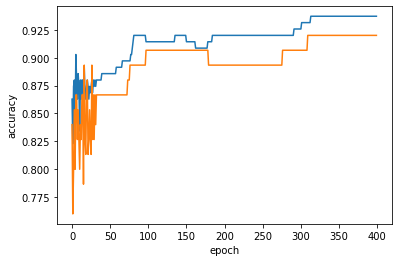

In [ ]:
#에포크
import numpy as np
sc = SGDClassifier(loss='log', random_state=50)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0,400):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))
  
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log', max_iter=320, tol=None, random_state=50)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9485714285714286
0.9333333333333333


In [ ]:
print(sc.predict(test_scaled[:18])) #구입여부 예측
print(test_target[:18]) #실제 구입여부

['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y']
['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y']


##Predict! 
##새로운 주민 중 성냥을 구입할 사람 예측하기

###새로운 데이터 준비하기

In [ ]:
new_match = pd.read_excel('/content/drive/My Drive/꼬꼬무_인공지능/3.1_성냥팔이소녀/match_data.xlsx', sheet_name='moved') #파일위치

new_match.head(10)

,name,gender,age,children,smoking,academic,income
0,Isla,1.0,28.0,2.0,1.0,0.0,52.0000
1,Samuel,0.0,20.0,0.0,1.0,0.0,58.9000
2,Amelia,1.0,18.0,1.0,20.0,0.0,154.0000
3,Olivia,1.0,29.0,2.0,11.0,1.0,211.3375
4,Ava,1.0,48.0,4.0,19.0,0.0,196.0000
5,Willow,1.0,11.0,2.0,0.0,1.0,79.1000
6,Lily,1.0,28.0,6.0,1.0,0.0,52.0000
7,Grayson,0.0,71.0,1.0,0.0,1.0,89.1000
8,Caleb,0.0,57.0,2.0,1.0,0.0,52.0000
9,Jasper,0.0,18.0,4.0,6.0,0.0,72.0000


In [ ]:
new_match_input = new_match[['gender', 'age', 'children', 'smoking', 'academic', 'income']].to_numpy()
new_match_scaled = ss.transform(new_match_input)

In [ ]:
name_data = new_match.loc[:,['name']]
print(name_data[:5])

#참고 - 첫번째 사람만 보기: name_data = new_match.loc[[0],['name']]

     name
0    Isla
1  Samuel
2  Amelia
3  Olivia
4     Ava


###K-최근접 이웃 분류 모델로 예측하기


In [ ]:
k_prediction = knr.predict(new_match_scaled[:]) #구입여부 예측
print(k_prediction)

#참고 - 첫번째 사람만 보기: predict_data = knr.predict(new_match_input[[0]])

['N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N'
 'N' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N'
 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N']


In [ ]:
print(type(name_data))
print(type(k_prediction))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
k_predict_data = pd.DataFrame(k_prediction)
print(k_predict_data[:5])

   0
0  N
1  N
2  N
3  N
4  Y


In [ ]:
k_new = name_data.join(k_predict_data)
print(k_new[:5])

     name  0
0    Isla  N
1  Samuel  N
2  Amelia  N
3  Olivia  N
4     Ava  Y


In [ ]:
k_new.columns=['이름', '구매여부예상']
print(k_new[:5])

       이름 구매여부예상
0    Isla      N
1  Samuel      N
2  Amelia      N
3  Olivia      N
4     Ava      Y


In [ ]:
#새로 이사 온 사람 중 구매할 것으로 예상되는 사람의 이름

k_condition = k_new.구매여부예상=='Y'
print(k_new.loc[k_condition, '이름'])

4          Ava
9       Jasper
12    Isabella
14       Jacob
19       Harry
21       River
22       Riley
27        Nico
29       Hazel
31       Emily
36        Ryan
37      Oakley
40         Ari
45      Nathan
47         Zoe
Name: 이름, dtype: object


###로지스틱 회귀 모델로 예측하기

In [ ]:
#from scipy.special import expit

new_decisions = lr.decision_function(new_match_scaled[:])
print(expit(new_decisions)) #구입확률

[0.04225146 0.00688334 0.93996614 0.91223835 0.99500653 0.07418989
 0.32463975 0.12136669 0.05429023 0.27726946 0.0649889  0.02052919
 0.40709451 0.06417054 0.92865229 0.02422221 0.21356377 0.59276802
 0.21463186 0.75795322 0.04907774 0.99786236 0.92698382 0.01121613
 0.04255475 0.07472222 0.21057879 0.95532987 0.41540447 0.12208831
 0.12077394 0.17830729 0.02982371 0.90075203 0.13085387 0.1254243
 0.99003963 0.96938587 0.09385405 0.06488153 0.65743175 0.52254779
 0.17381191 0.03660203 0.02992436 0.93478377 0.01413912 0.9656526
 0.14897974 0.66742245]


In [ ]:
lr_prediction = expit(new_decisions)
print(type(lr_prediction))

<class 'numpy.ndarray'>


In [ ]:
lr_predict_data = pd.DataFrame(lr_prediction)
print(lr_predict_data[:5])

          0
0  0.042251
1  0.006883
2  0.939966
3  0.912238
4  0.995007


In [ ]:
lr_new = name_data.join(lr_predict_data)
print(lr_new[:5])

     name         0
0    Isla  0.042251
1  Samuel  0.006883
2  Amelia  0.939966
3  Olivia  0.912238
4     Ava  0.995007


In [ ]:
lr_new.columns=['이름', '구매확률예상']
print(lr_new[:5])

       이름    구매확률예상
0    Isla  0.042251
1  Samuel  0.006883
2  Amelia  0.939966
3  Olivia  0.912238
4     Ava  0.995007


In [ ]:
#새로 이사 온 사람들 중 구매할 확률이 50% 이상인 사람(이름, 확률)

lr_condition = lr_new.구매확률예상>=0.5
print(lr_new.loc[lr_condition, '이름'])

2     Amelia
3     Olivia
4        Ava
14     Jacob
17       Mia
19     Harry
21     River
22     Riley
27      Nico
33     Chloe
36      Ryan
37    Oakley
40       Ari
41     Grace
45    Nathan
47       Zoe
49      Toby
Name: 이름, dtype: object


###확률적 경사 하강법 모델로 예측하기

In [ ]:
s_prediction = sc.predict(new_match_scaled) #구입여부 예측
print(s_prediction)

['N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N'
 'N' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y']


In [ ]:
print(type(s_prediction))

<class 'numpy.ndarray'>


In [ ]:
s_predict_data = pd.DataFrame(s_prediction)
print(s_predict_data[:5])

   0
0  N
1  N
2  Y
3  Y
4  Y


In [ ]:
s_new = name_data.join(s_predict_data)
print(s_new[:5])

     name  0
0    Isla  N
1  Samuel  N
2  Amelia  Y
3  Olivia  Y
4     Ava  Y


In [ ]:
s_new.columns=['이름', '구매여부예상']
print(s_new[:5])

       이름 구매여부예상
0    Isla      N
1  Samuel      N
2  Amelia      Y
3  Olivia      Y
4     Ava      Y


In [ ]:
#새로 이사 온 사람 중 구매할 것으로 예상되는 사람의 이름

s_condition = s_new.구매여부예상=='Y'
print(s_new.loc[s_condition, '이름'])

2     Amelia
3     Olivia
4        Ava
14     Jacob
19     Harry
21     River
22     Riley
27      Nico
28     Louie
33     Chloe
36      Ryan
37    Oakley
40       Ari
41     Grace
45    Nathan
47       Zoe
49      Toby
Name: 이름, dtype: object
